<a href="https://colab.research.google.com/github/youminpark/NEUR265/blob/main/notebooks/Loops_02_14_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Fundamentals IV

### Loops

In this notebook, we'll begin writing loops.

## At the end of this notebook, you'll be able to:

* Write a simple loop
* Write a simple function

## Loops

Loops allow you to run a bit of code multiple times. They're a great way to avoid copying and pasting the same bit of code multiple times.

### Loops can be written in multiple ways.

The `for` loop iterates over the elements of the supplied list, and executes the containing block once for each element.

Any kind of list can be used in the for loop (e.g., a list, a range, etc.)

In [2]:
# Simple for loop

values = range(4)

# Iterate from i = 0 to i = 3

for i in values:
  print(i)

0
1
2
3


The logic behind this loop looks something like this:

<img src = 'https://drive.google.com/uc?id=13-Mg6fyW5WmyIfot0Y7zpMI64cdC9GbU'>



><b>Task:</b> Make a `for` loop that re-creates the text in the below image:

<img src = 'https://drive.google.com/uc?id=1sdA0HB65T4ZEOojbIk1CMz_ZDa7U8Zj9'>


In [6]:
# Your code here
count = range(3);
phrase1 = "you son of a bitch i'm in";
phrase2 = "you son of a bitch i'm out";

# Iterate from i = 0 to i = 2
for i in count:
  print(phrase1);

print(phrase2);

you son of a bitch i'm in
you son of a bitch i'm in
you son of a bitch i'm in
you son of a bitch i'm out


Sometimes it is useful to have access to the indices of the values when iterating over a list. We can use the `enumerate` function for this:

In [7]:
for idx, x in enumerate(range(-3,3)):
    print(idx, x)

0 -3
1 -2
2 -1
3 0
4 1
5 2


### List Comprehensions

List comprehensions are a very compact way to create lists using a `for` loop:

In [8]:
# Create a list of values where x is squared for 0, 1, 2, 3, and 4.

list_1 = [x**2 for x in range(0,5)]

print(list_1)

[0, 1, 4, 9, 16]


### While loops

The operator `while` lets you continue to run a loop as long as something is true.

While loops always have the structure

```
while condition:
  # Loop contents
```  

In [9]:
message = 'still working'
counter = 0

while counter < 5:
    print(message)

    counter = counter + 1

print("done")

still working
still working
still working
still working
still working
done


### Continue operator

<code>continue</code> is a special operator to jump ahead to the next iteration of a loop.

In [10]:
lst = [0, 1, 2, 3]

for item in lst:

    if item == 2:
        continue

    print(item)

0
1
3


><b>Task:</b> Re-create the above <code>for</code> loop, but have it skip to the next item if the item equals 1 *or* 2.

In [15]:
# Your code here
lst = [0, 1, 2, 3]

for item in lst:

    if item == 1 or item == 2:
        continue
    print(item)

0
3


### Applying loops to neuroscience data

We'll work with our Patch-Seq dataset (portal.brain-map.org) for these exercises

Create a code cell below that imports the <code>patch_seq_expanded.csv</code> file from our class GitHub repo as a <code>Pandas DataFrame</code> variable called <code>patch_seq</code>.

In [16]:
# Your code here
import pandas as pd

url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv'
patch_seq = pd.read_csv(url);

Look at this variable below. There should be three column headers: <code>Marker</code>, <code>ISI</code>, and <code>Fast_Trough</code>. You're already familiar with <code>Marker</code> and <code>ISI</code>, and you were introduced to <code>Fast_Trough</code> last week when we looked at the minimum value of the membrane potential during the undershoot.

![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)

In [17]:
# Look at your patch_seq variable here
patch_seq

# Note: fast_trough is the lowest voltage of an action potential

,ISI,Fast_Trough,Marker
0,77.337143,-49.899998,Sst
1,17.177895,-44.462498,Sst
2,48.294737,-47.350002,Sst
3,8.980000,-45.656254,Sst
4,30.315385,-50.737499,Sst
...,...,...,...
360,11.052333,-54.743752,Pvalb
361,8.860360,-64.875008,Pvalb
362,9.192897,-51.312504,Pvalb
363,10.544731,-52.281254,Pvalb


Let's create a loop that will make a scatter plot of <code>ISI</code> vs. <code>Fast_Trough</code> only for *Sst*-containing neurons

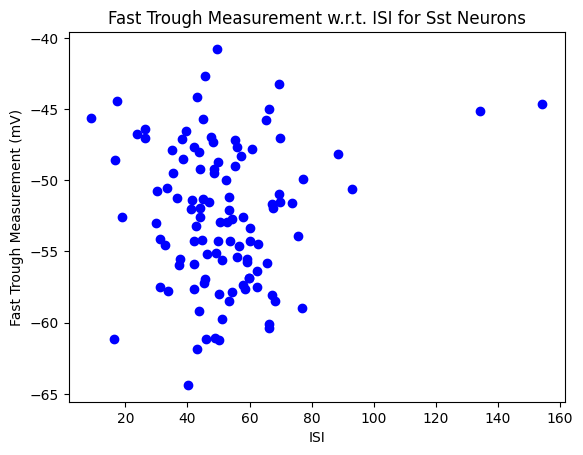

In [20]:
from matplotlib import pyplot as plt

# Create a variable that stores the size of the longest axis
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "blue")
    plt.xlabel('ISI');
    plt.ylabel('Fast Trough Measurement (mV)');
    plt.title('Fast Trough Measurement w.r.t. ISI for Sst Neurons');


><b>Task:</b> Re-run the above code cell, but create labels for your x-axis and y-axis.

><b>Task:</b> Create a <code>for</code> loop that will make a scatter plot of <code>ISI</code> vs. <code>Fast Trough</code> for *Sst*-containing neurons in blue, and *Pvalb*-containing neurons in red. Label your axes.

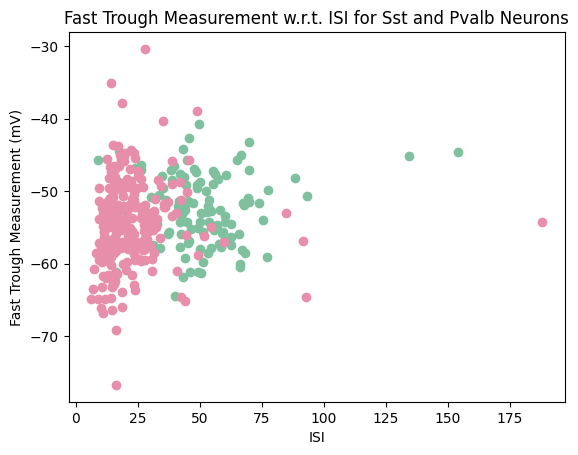

In [28]:
# Your code here
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "#7FC09E")
  elif patch_seq.iloc[i,2] == 'Pvalb':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "#E78EAA")

plt.xlabel('ISI');
plt.ylabel('Fast Trough Measurement (mV)');
plt.title('Fast Trough Measurement w.r.t. ISI for Sst and Pvalb Neurons');

# Functions

If we have a useful chunk of code, we can save that as a function to easily recall later, using the keyword `def`. The syntax for functions is similar to loops and if statements:

```
def function():
  print(value)
```



In [31]:
# Make a function that makes a scatter plot for Sst neurons in blue, and Pvalb neurons in red

def makeScatter(data):
    patch_length = len(data)
    for i in range(patch_length):
      if data.iloc[i,2] == 'Sst':
        plt.scatter(data.iloc[i,0],data.iloc[i,1],color = "#7FC09E")
      elif data.iloc[i,2] == 'Pvalb':
        plt.scatter(data.iloc[i,0],data.iloc[i,1],color = "#E78EAA")

    plt.xlabel('ISI');
    plt.ylabel('Fast Trough Measurement (mV)');
    plt.title('Fast Trough Measurement w.r.t. ISI for Sst and Pvalb Neurons');
    plt.show()



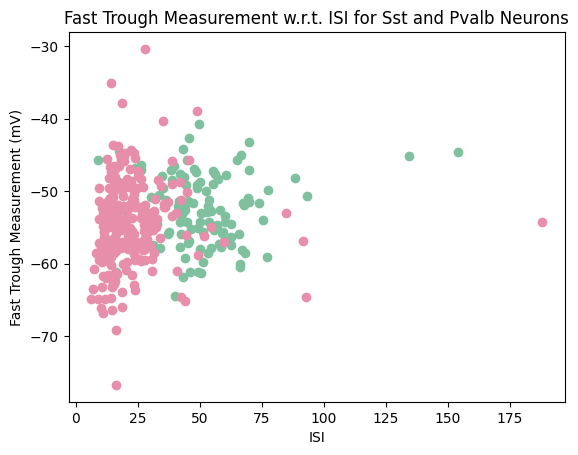

In [32]:
makeScatter(patch_seq)